In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



In [ ]:
image = cv.imread('iitrpr.jpg',0)
# gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
equalize = cv.equalizeHist(image)

In [ ]:
cv.imshow("original Image", image)
cv.imshow("Equalized Image", equalize)
cv.waitKey(0)
cv.destroyAllWindows()

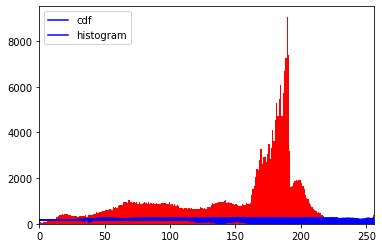

In [ ]:
plt.plot(image, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

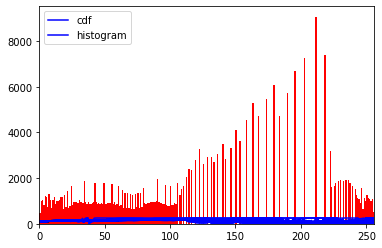

In [ ]:
plt.plot(equalize, color = 'b')
plt.hist(equalize.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

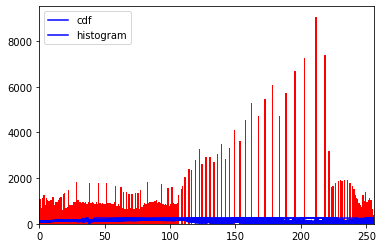

In [ ]:
def histeq(img):
    # Convert the image to grayscale
    gray =img
    
    # Compute the cumulative distribution function of the image
    hist,bins = np.histogram(gray.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    cdf_normalized = np.ma.masked_equal(cdf,0)
    cdf_normalized = (cdf_normalized - cdf_normalized.min())*255/(cdf_normalized.max()-cdf_normalized.min())
    cdf = np.ma.filled(cdf_normalized,0).astype('uint8')
    # Apply histogram equalization
    eq_img = cdf[img]

    # Display the original and equalized images
    cv.imshow("Original Image", gray)
    cv.imshow("User Equalized Image", eq_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    return eq_img

img=cv.imread('iitrpr.jpg',0)
eq_img=histeq(img)

plt.plot(eq_img, color = 'b')
plt.hist(eq_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
def RMSError(a1, a2):
    assert a1.shape == a2.shape
    rmse =np.sqrt( np.mean((a1 - a2) ** 2))
    return rmse

In [ ]:
print("Inbuilt\n")
RMSError(image,equalize)

Inbuilt



11.481084919467706

In [ ]:
print("User Defined\n")
RMSError(image,eq_img)

User Defined



11.169441758973715